In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [50]:
import requests
from bs4 import BeautifulSoup as bs

urls = ['https://www.yelp.com/biz/thursday-kitchen-new-york?osq=Restaurants',
        'https://www.yelp.com/biz/the-cabin-nyc-new-york-2?osq=Restaurants',
        'https://www.yelp.com/biz/am%C3%A9lie-new-york?osq=Restaurants',
        'https://www.yelp.com/biz/the-osprey-brooklyn?osq=Restaurants',
        'https://www.yelp.com/biz/sunday-in-brooklyn-brooklyn-3?osq=Restaurants',
        'https://www.yelp.com/biz/brothers-pizzeria-bronx?osq=Brothers+Pizzeria',
        'https://www.yelp.com/biz/little-caesars-pizza-bronx-7?osq=Little+Caesars+Pizza',
        'https://www.yelp.com/biz/rafaelina-restaurant-bar-bronx',
        'https://www.yelp.com/biz/wendys-wichita-2?osq=Wendy',
        'https://www.yelp.com/biz/sonic-drive-in-bonner-springs?osq=Sonic+Drive-In',]
data = {}
for url in urls :
    r=requests.get(url)
    soup=bs(r.content,'html.parser')
    value = soup.find_all('span',class_='raw__373c0__3rcx7')
    review_list=[]
    for i in range(0, len(value)):
        review_list.append(value[i].get_text())
    soup=BeautifulSoup(r.text)
    restraunt_name = soup.h1.string
    data[restraunt_name] = review_list

data
    

{'Thursday Kitchen': ['424 E 9th St',
  'New York, NY 10009',
  "Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.",
  'Start your review of Thursday Kitchen.',
  "I LOVED this spot and would argue it's one of the best Korean fusion tapas I've had! We tried the edamame dumplings, steak, truffle mac & cheese, popcorn chicken, and cauliflower (in order of my favorites). They were all soo good but the edamame dumplings & steak stole the show! * Edamame dumplings- filled with a smooth & creamy edamame paste and topped with the perfect amount of truffle oil & Parmesan. So unique and delicious! My only complaint is I wish this plate came with more! We shared amongst 3 and got ~1 each* Steak- tender and cooked to perfection. Topped with a soy garlic glaze and coupled with grits-like feta cheese. Absolutely amazing * Truffle Mac & cheese - I loved that you can smell the truffle the minute they bring it by your table, they don't skimp on the tr

In [51]:

data.keys()

dict_keys(['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In'])

In [52]:
data['Rafaelina Restaurant Bar'][:5]

['2776 Webster Ave',
 'Bronx, NY 10458',
 "Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.",
 'Start your review of Rafaelina Restaurant Bar.',
 "I ordered delivery on a Wednesday night and it arrived quickly. It was pouring so I felt horrible but nonetheless, the service was great. The food wasn't bad but I don't think I would order again unless I didn't have an option. I did get 10% off, so yay for that!Overall, great service but the food was mediocre."]

In [53]:
#Cleaning The Data


In [54]:
next(iter(data.keys()))

'Thursday Kitchen'

In [55]:
next(iter(data.values()))

['424 E 9th St',
 'New York, NY 10009',
 "Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.",
 'Start your review of Thursday Kitchen.',
 "I LOVED this spot and would argue it's one of the best Korean fusion tapas I've had! We tried the edamame dumplings, steak, truffle mac & cheese, popcorn chicken, and cauliflower (in order of my favorites). They were all soo good but the edamame dumplings & steak stole the show! * Edamame dumplings- filled with a smooth & creamy edamame paste and topped with the perfect amount of truffle oil & Parmesan. So unique and delicious! My only complaint is I wish this plate came with more! We shared amongst 3 and got ~1 each* Steak- tender and cooked to perfection. Topped with a soy garlic glaze and coupled with grits-like feta cheese. Absolutely amazing * Truffle Mac & cheese - I loved that you can smell the truffle the minute they bring it by your table, they don't skimp on the truffle! This was delicious

In [56]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [57]:
#for key in data.keys():
#    clean_value = data[key]
#    print(clean_value)
#    clean_value_string = combine_text(clean_value)
#   data[key] = clean_value_string
#data

In [58]:
data_combined = {key:[combine_text(value)]
                 for (key,value) in data.items()}
data_combined

{'Thursday Kitchen': ["424 E 9th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your review of Thursday Kitchen. I LOVED this spot and would argue it's one of the best Korean fusion tapas I've had! We tried the edamame dumplings, steak, truffle mac & cheese, popcorn chicken, and cauliflower (in order of my favorites). They were all soo good but the edamame dumplings & steak stole the show! * Edamame dumplings- filled with a smooth & creamy edamame paste and topped with the perfect amount of truffle oil & Parmesan. So unique and delicious! My only complaint is I wish this plate came with more! We shared amongst 3 and got ~1 each* Steak- tender and cooked to perfection. Topped with a soy garlic glaze and coupled with grits-like feta cheese. Absolutely amazing * Truffle Mac & cheese - I loved that you can smell the truffle the minute they bring it by your table, they don't skimp on the truffle! This was deli

In [59]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Amélie,"22 W 8th St New York, NY 10011 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your rev..."
Brothers Pizzeria,"27 E Kingsbridge Rd Bronx, NY 10468 Yelp users haven’t asked any questions yet about Brothers Pizzeria. Your trust is our top concern, so business..."
Little Caesars Pizza,"119 W Kingsbridge Rd Bronx, NY 10468 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start yo..."
Rafaelina Restaurant Bar,"2776 Webster Ave Bronx, NY 10458 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r..."
Sonic Drive-In,"11555 Kaw Dr Bonner Springs, KS 66012 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start y..."
Sunday in Brooklyn,"348 Wythe Ave Brooklyn, NY 11249 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r..."
The Cabin NYC,"205 E 4th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
The Osprey,"60 Furman St Brooklyn, NY 11201 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
Thursday Kitchen,"424 E 9th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
Wendy's,"2120 N. Woodlawn Wichita, KS 67208 Yelp users haven’t asked any questions yet about Wendy's. Your trust is our top concern, so businesses can't pa..."


In [60]:
# Let's take a look at the transcript for thursday kitchen
data_df.transcript.loc['Thursday Kitchen']

"424 E 9th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your review of Thursday Kitchen. I LOVED this spot and would argue it's one of the best Korean fusion tapas I've had! We tried the edamame dumplings, steak, truffle mac & cheese, popcorn chicken, and cauliflower (in order of my favorites). They were all soo good but the edamame dumplings & steak stole the show! * Edamame dumplings- filled with a smooth & creamy edamame paste and topped with the perfect amount of truffle oil & Parmesan. So unique and delicious! My only complaint is I wish this plate came with more! We shared amongst 3 and got ~1 each* Steak- tender and cooked to perfection. Topped with a soy garlic glaze and coupled with grits-like feta cheese. Absolutely amazing * Truffle Mac & cheese - I loved that you can smell the truffle the minute they bring it by your table, they don't skimp on the truffle! This was delicious and creamy! (but

In [61]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

#for key in data.keys():
 #   round1=data[key]
  #  print(round1)
   # clean_value_round1 = clean_text_round1(round1)
   # data[key] = clean_value_round1
   # print(clean_value_round1)///

In [62]:
data_df

,transcript
Amélie,"22 W 8th St New York, NY 10011 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your rev..."
Brothers Pizzeria,"27 E Kingsbridge Rd Bronx, NY 10468 Yelp users haven’t asked any questions yet about Brothers Pizzeria. Your trust is our top concern, so business..."
Little Caesars Pizza,"119 W Kingsbridge Rd Bronx, NY 10468 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start yo..."
Rafaelina Restaurant Bar,"2776 Webster Ave Bronx, NY 10458 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r..."
Sonic Drive-In,"11555 Kaw Dr Bonner Springs, KS 66012 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start y..."
Sunday in Brooklyn,"348 Wythe Ave Brooklyn, NY 11249 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r..."
The Cabin NYC,"205 E 4th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
The Osprey,"60 Furman St Brooklyn, NY 11201 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
Thursday Kitchen,"424 E 9th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
Wendy's,"2120 N. Woodlawn Wichita, KS 67208 Yelp users haven’t asked any questions yet about Wendy's. Your trust is our top concern, so businesses can't pa..."


In [63]:
# Let's take a look at the updated text
#data_df = pd.DataFrame.from_dict(data_combined).transpose()
#data_df
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
Amélie,w st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of amélie c...
Brothers Pizzeria,e kingsbridge rd bronx ny yelp users haven’t asked any questions yet about brothers pizzeria your trust is our top concern so businesses cant pa...
Little Caesars Pizza,w kingsbridge rd bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of ...
Rafaelina Restaurant Bar,webster ave bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of rafae...
Sonic Drive-In,kaw dr bonner springs ks your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of s...
Sunday in Brooklyn,wythe ave brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of sund...
The Cabin NYC,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the cabi...
The Osprey,furman st brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the ...
Thursday Kitchen,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of thursday...
Wendy's,n woodlawn wichita ks yelp users haven’t asked any questions yet about wendys your trust is our top concern so businesses cant pay to alter or r...


In [64]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

#for key in data.keys():
#    round2=data[key]
#    clean_value_round2 = clean_text_round2(round2)
#    data[key] = clean_value_round2
#    print(clean_value_round2)


In [65]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
Amélie,w st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of amélie c...
Brothers Pizzeria,e kingsbridge rd bronx ny yelp users havent asked any questions yet about brothers pizzeria your trust is our top concern so businesses cant pay...
Little Caesars Pizza,w kingsbridge rd bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of ...
Rafaelina Restaurant Bar,webster ave bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of rafae...
Sonic Drive-In,kaw dr bonner springs ks your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of s...
Sunday in Brooklyn,wythe ave brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of sund...
The Cabin NYC,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the cabi...
The Osprey,furman st brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the ...
Thursday Kitchen,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of thursday...
Wendy's,n woodlawn wichita ks yelp users havent asked any questions yet about wendys your trust is our top concern so businesses cant pay to alter or re...


In [66]:
## Organizing The Data

In [67]:
### Corpus

In [68]:
### Document-Term Matrix

In [69]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,abandon,able,absolute,absolutely,accents,accepted,accommodate,accommodating,accomplishment,...,youhighly,youll,youre,yous,youve,yuck,yummy,yuzu,zaatar,zero
Amélie,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Brothers Pizzeria,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Little Caesars Pizza,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rafaelina Restaurant Bar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Sonic Drive-In,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sunday in Brooklyn,0,0,3,0,1,0,1,0,0,0,...,1,0,5,0,0,0,1,0,1,0
The Cabin NYC,0,0,0,0,0,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,0
The Osprey,0,0,0,1,0,0,0,0,2,0,...,0,1,2,0,1,0,0,0,0,0
Thursday Kitchen,0,0,3,0,3,0,0,0,0,1,...,0,0,3,0,0,0,0,1,0,0
Wendy's,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Exploratory Data Analysis

In [71]:
# Read in the document-term matrix
data=data_dtm.transpose()
data.head()

,Amélie,Brothers Pizzeria,Little Caesars Pizza,Rafaelina Restaurant Bar,Sonic Drive-In,Sunday in Brooklyn,The Cabin NYC,The Osprey,Thursday Kitchen,Wendy's
aa,0,0,1,0,0,0,0,0,0,0
abandon,0,1,0,0,0,0,0,0,0,0
able,1,0,1,0,0,3,0,0,3,0
absolute,0,0,0,0,0,0,0,1,0,0
absolutely,1,0,0,0,0,1,0,0,3,2


In [72]:
# Find the top 30 words said by each reviews
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Amélie': [('wine', 14),
  ('restaurant', 10),
  ('good', 8),
  ('french', 8),
  ('place', 7),
  ('great', 7),
  ('food', 6),
  ('brunch', 6),
  ('happy', 6),
  ('flights', 6),
  ('sauce', 6),
  ('time', 6),
  ('cheese', 6),
  ('like', 5),
  ('menu', 5),
  ('medium', 5),
  ('duck', 5),
  ('escargot', 5),
  ('thought', 5),
  ('steak', 4),
  ('dont', 4),
  ('covid', 4),
  ('goat', 4),
  ('fries', 4),
  ('love', 4),
  ('hour', 4),
  ('octopus', 4),
  ('people', 4),
  ('cooked', 4),
  ('burrata', 4)],
 'Brothers Pizzeria': [('place', 5),
  ('food', 5),
  ('called', 4),
  ('delivery', 3),
  ('pie', 3),
  ('told', 3),
  ('customer', 3),
  ('ago', 3),
  ('man', 3),
  ('order', 3),
  ('service', 3),
  ('seamless', 2),
  ('brothers', 2),
  ('away', 2),
  ('pizzeria', 2),
  ('said', 2),
  ('pizza', 2),
  ('zero', 2),
  ('showed', 2),
  ('awful', 2),
  ('busy', 2),
  ('slice', 2),
  ('pasta', 2),
  ('nice', 2),
  ('got', 2),
  ('stay', 2),
  ('ordering', 2),
  ('ordered', 2),
  ('stars', 2),
  (

In [73]:
# Print the top 15 words said by each reviews
for resturant, top_words in top_dict.items():
    print(resturant)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Amélie
wine, restaurant, good, french, place, great, food, brunch, happy, flights, sauce, time, cheese, like
---
Brothers Pizzeria
place, food, called, delivery, pie, told, customer, ago, man, order, service, seamless, brothers, away
---
Little Caesars Pizza
pizza, employee, douche, little, order, place, caesars, rude, dont, going, location, bag, time, attitude
---
Rafaelina Restaurant Bar
food, delivery, called, time, order, restaurant, didnt, hours, ordered, just, place, like, dont, away
---
Sonic Drive-In
order, sonic, cold, service, tell, lemonade, food, sonics, just, strawberry, ive, customer, took, worst
---
Sunday in Brooklyn
pancakes, sunday, brunch, avocado, really, come, ordered, food, came, got, like, brooklyn, im, try
---
The Cabin NYC
food, good, place, drinks, brunch, spot, like, service, great, chicken, people, really, cute, make
---
The Osprey
food, just, great, like, good, brooklyn, restaurant, osprey, dinner, time, came, experience, park, place
---
Thursday Kitchen
ch

In [74]:
# Look at the most common top words
from collections import Counter
words = []
for resturant in data.columns:
    top = [word for (word, count) in top_dict[resturant]]
    for t in top:
        words.append(t)
        
words

['wine',
 'restaurant',
 'good',
 'french',
 'place',
 'great',
 'food',
 'brunch',
 'happy',
 'flights',
 'sauce',
 'time',
 'cheese',
 'like',
 'menu',
 'medium',
 'duck',
 'escargot',
 'thought',
 'steak',
 'dont',
 'covid',
 'goat',
 'fries',
 'love',
 'hour',
 'octopus',
 'people',
 'cooked',
 'burrata',
 'place',
 'food',
 'called',
 'delivery',
 'pie',
 'told',
 'customer',
 'ago',
 'man',
 'order',
 'service',
 'seamless',
 'brothers',
 'away',
 'pizzeria',
 'said',
 'pizza',
 'zero',
 'showed',
 'awful',
 'busy',
 'slice',
 'pasta',
 'nice',
 'got',
 'stay',
 'ordering',
 'ordered',
 'stars',
 'counter',
 'pizza',
 'employee',
 'douche',
 'little',
 'order',
 'place',
 'caesars',
 'rude',
 'dont',
 'going',
 'location',
 'bag',
 'time',
 'attitude',
 'service',
 'lunch',
 'wearing',
 'store',
 'horrible',
 'disgusting',
 'customers',
 'employees',
 'people',
 'especially',
 'wings',
 'mask',
 'despite',
 'pay',
 'review',
 'short',
 'food',
 'delivery',
 'called',
 'time',
 'o

In [75]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('place', 9),
 ('food', 9),
 ('time', 8),
 ('like', 6),
 ('service', 6),
 ('just', 6),
 ('good', 5),
 ('great', 5),
 ('order', 5),
 ('got', 4),
 ('ordered', 4),
 ('chicken', 4),
 ('came', 4),
 ('really', 4),
 ('restaurant', 3),
 ('brunch', 3),
 ('dont', 3),
 ('people', 3),
 ('nice', 3),
 ('going', 3),
 ('amazing', 3),
 ('wine', 2),
 ('cheese', 2),
 ('steak', 2),
 ('fries', 2),
 ('love', 2),
 ('hour', 2),
 ('called', 2),
 ('delivery', 2),
 ('told', 2),
 ('customer', 2),
 ('away', 2),
 ('pizza', 2),
 ('rude', 2),
 ('bag', 2),
 ('pay', 2),
 ('review', 2),
 ('cold', 2),
 ('took', 2),
 ('did', 2),
 ('ive', 2),
 ('minutes', 2),
 ('pretty', 2),
 ('brooklyn', 2),
 ('delicious', 2),
 ('sandwich', 2),
 ('wait', 2),
 ('drinks', 2),
 ('portion', 2),
 ('definitely', 2),
 ('usually', 2),
 ('french', 1),
 ('happy', 1),
 ('flights', 1),
 ('sauce', 1),
 ('menu', 1),
 ('medium', 1),
 ('duck', 1),
 ('escargot', 1),
 ('thought', 1),
 ('covid', 1),
 ('goat', 1),
 ('octopus', 1),
 ('cooked', 1),
 ('burrata

In [76]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

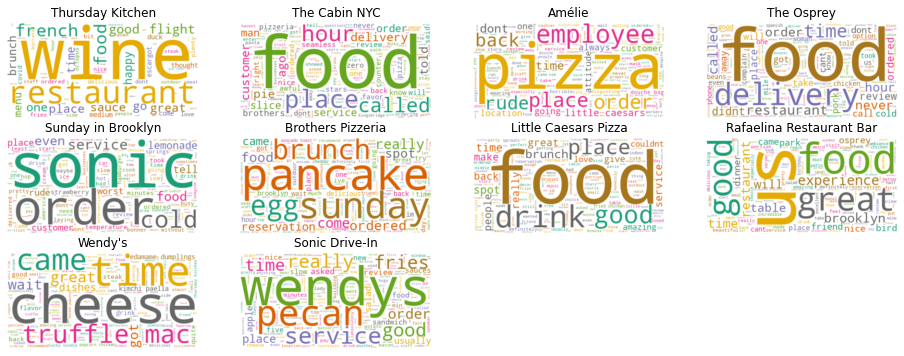

In [77]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]


resturant_names = ['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In' ]

# Create subplots for each restrurant
for index, resturant in enumerate(data.columns):
    wc.generate(data_clean.transcript[resturant])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(resturant_names[index])
    
plt.show()

In [78]:
# Find the number of unique words that each resturants uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for resturant in data.columns:
    uniques = data[resturant].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(resturant_names, unique_list)), columns=['', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,,unique_words
4,Sunday in Brooklyn,197
9,Sonic Drive-In,224
1,The Cabin NYC,225
3,The Osprey,273
2,Amélie,289
0,Thursday Kitchen,443
8,Wendy's,455
6,Little Caesars Pizza,465
7,Rafaelina Restaurant Bar,525
5,Brothers Pizzeria,581


In [79]:
# Find the total number of words that a resturant uses
total_list = []
for resturant in data.columns:
    totals = sum(data[resturant])
    total_list.append(totals)
    
resturant_names = ['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In' ]
star_rating = [4.5, 4, 4.5, 4, 4, 1.5, 1.5, 1.5, 1.5, 1.5]
number_of_reviews = [1390, 277, 2721, 232, 870, 10, 9, 21, 12, 10]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words

,,unique_words,total_words
0,Thursday Kitchen,443,720
1,The Cabin NYC,225,280
2,Amélie,289,405
3,The Osprey,273,425
4,Sunday in Brooklyn,197,273
5,Brothers Pizzeria,581,1043
6,Little Caesars Pizza,465,772
7,Rafaelina Restaurant Bar,525,770
8,Wendy's,455,810
9,Sonic Drive-In,224,319


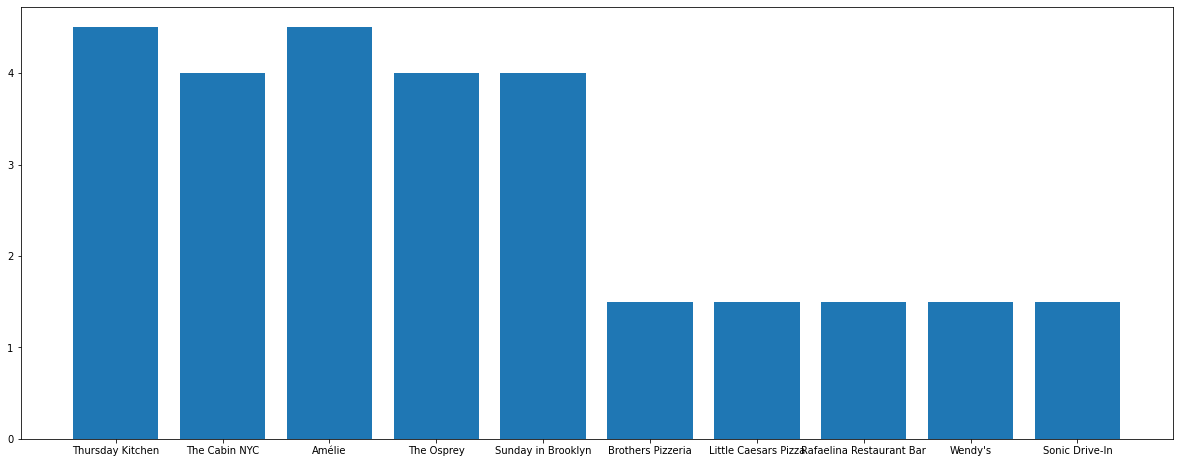

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
star_rating = [4.5, 4, 4.5, 4, 4, 1.5, 1.5, 1.5, 1.5, 1.5]
number_of_reviews = [1390, 277, 2721, 232, 870, 10, 9, 21, 12, 10]
resturant_names = ['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In' ]
ax.bar(resturant_names,star_rating)
plt.show()

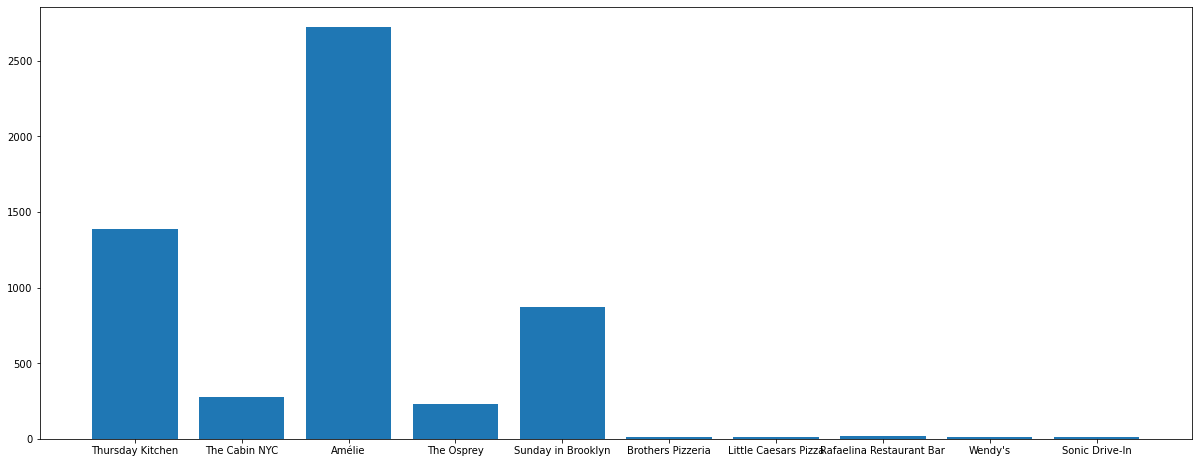

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

resturant_names = ['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In' ]
star_rating = [4.5, 4, 4.5, 4, 4, 1.5, 1.5, 1.5, 1.5, 1.5]
number_of_reviews = [1390, 277, 2721, 232, 870, 10, 9, 21, 12, 10]

ax.bar(resturant_names,number_of_reviews)
plt.show()



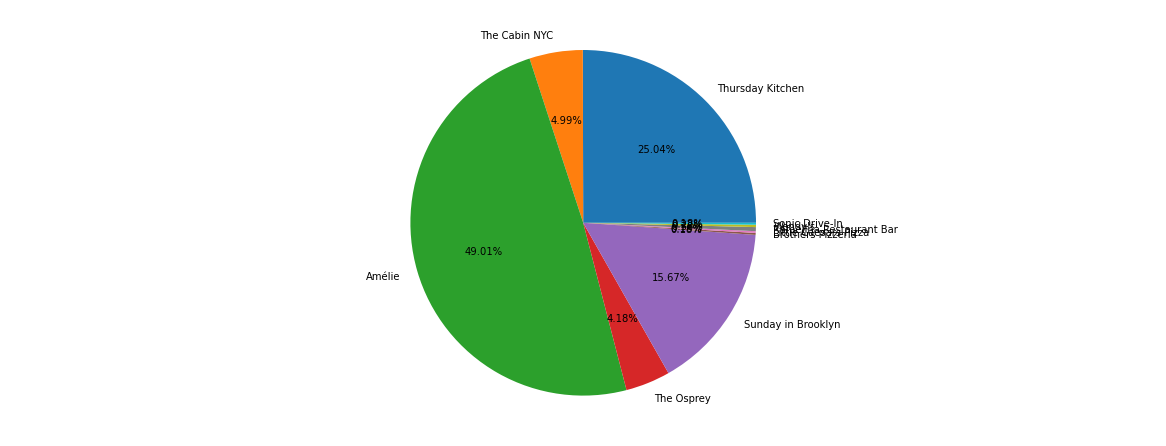

In [36]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
star_rating = [4.5, 4, 4.5, 4, 4, 1.5, 1.5, 1.5, 1.5, 1.5]
number_of_reviews = [1390, 277, 2721, 232, 870, 10, 9, 21, 12, 10]
resturant_names = ['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In' ]
ax.pie(number_of_reviews, labels = resturant_names,autopct='%1.2f%%')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'resturant_names'

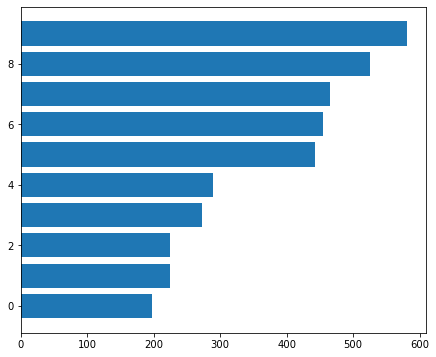

In [37]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.resturant_names)
plt.title('Number of Unique Words', fontsize=20)
plt.tight_layout()
plt.show()


In [38]:
### Amount of Profanity

In [39]:
#  Let's take a look at the most common words again.
Counter(words).most_common()

[('place', 9),
 ('food', 9),
 ('time', 8),
 ('like', 6),
 ('service', 6),
 ('just', 6),
 ('good', 5),
 ('great', 5),
 ('order', 5),
 ('got', 4),
 ('ordered', 4),
 ('chicken', 4),
 ('came', 4),
 ('really', 4),
 ('restaurant', 3),
 ('brunch', 3),
 ('dont', 3),
 ('people', 3),
 ('nice', 3),
 ('going', 3),
 ('amazing', 3),
 ('wine', 2),
 ('cheese', 2),
 ('steak', 2),
 ('fries', 2),
 ('love', 2),
 ('hour', 2),
 ('called', 2),
 ('delivery', 2),
 ('told', 2),
 ('customer', 2),
 ('away', 2),
 ('pizza', 2),
 ('rude', 2),
 ('bag', 2),
 ('pay', 2),
 ('review', 2),
 ('cold', 2),
 ('took', 2),
 ('did', 2),
 ('ive', 2),
 ('minutes', 2),
 ('pretty', 2),
 ('brooklyn', 2),
 ('delicious', 2),
 ('sandwich', 2),
 ('wait', 2),
 ('drinks', 2),
 ('portion', 2),
 ('definitely', 2),
 ('usually', 2),
 ('french', 1),
 ('happy', 1),
 ('flights', 1),
 ('sauce', 1),
 ('menu', 1),
 ('medium', 1),
 ('duck', 1),
 ('escargot', 1),
 ('thought', 1),
 ('covid', 1),
 ('goat', 1),
 ('octopus', 1),
 ('cooked', 1),
 ('burrata

In [48]:
# Let's isolate just these bad words
data_offensive_words = data.transpose()[['shit', 'suck']]

data_profanity = pd.concat([ data_offensive_words.shit + data_offensive_words.suck ], axis=1)
data_profanity.columns = ['offensive_words']
data_profanity

,offensive_words
Amélie,0
Brothers Pizzeria,1
Little Caesars Pizza,0
Rafaelina Restaurant Bar,1
Sonic Drive-In,0
Sunday in Brooklyn,1
The Cabin NYC,0
The Osprey,1
Thursday Kitchen,0
Wendy's,0


In [58]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['small','wait', 'time', 'little', 'cold', 'weird']]

data_pro_negative = pd.concat([data_bad_words.small + data_bad_words.wait + data_bad_words.time + data_bad_words.little + data_bad_words.cold 
                            +data_bad_words.weird], axis=1)
data_pro_negative.columns = ['bad_words']
data_pro_negative



2021-05-09 20:03:08,736 : INFO : NumExpr defaulting to 8 threads.


,bad_words
Amélie,9
Brothers Pizzeria,3
Little Caesars Pizza,12
Rafaelina Restaurant Bar,14
Sonic Drive-In,9
Sunday in Brooklyn,12
The Cabin NYC,12
The Osprey,10
Thursday Kitchen,26
Wendy's,7


In [59]:
# Let's isolate just these positive words
data_pos_words = data.transpose()[['great','good', 'like', 'amazing', 'delicious', 'love', 'best','beautiful','recommend','new',
                                  'enjoyed','glad','happy','interesting','perfectly','pretty','warm','loved','better','incredible']]

data_pro_positive = pd.concat([data_pos_words.great + data_pos_words.good + data_pos_words.like + data_pos_words.amazing + data_pos_words.delicious 
                            + data_pos_words.love + data_pos_words.best + data_pos_words.beautiful +data_pos_words.recommend+data_pos_words.new +
                           data_pos_words.enjoyed + data_pos_words.glad + data_pos_words.happy + data_pos_words.interesting + data_pos_words.perfectly
                            + data_pos_words.pretty+ data_pos_words.warm+ data_pos_words.loved+ data_pos_words.better+ data_pos_words.incredible], axis=1)

data_pro_positive.columns = ['positive_words']
data_pro_positive

,positive_words
Amélie,50
Brothers Pizzeria,5
Little Caesars Pizza,5
Rafaelina Restaurant Bar,11
Sonic Drive-In,5
Sunday in Brooklyn,46
The Cabin NYC,48
The Osprey,54
Thursday Kitchen,55
Wendy's,18


In [60]:
## Sentiment of Routine

In [61]:
data_df

,transcript
Amélie,"22 W 8th St New York, NY 10011 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your rev..."
Brothers Pizzeria,"27 E Kingsbridge Rd Bronx, NY 10468 Yelp users haven’t asked any questions yet about Brothers Pizzeria. Your trust is our top concern, so business..."
Little Caesars Pizza,"119 W Kingsbridge Rd Bronx, NY 10468 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start yo..."
Rafaelina Restaurant Bar,"2776 Webster Ave Bronx, NY 10458 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r..."
Sonic Drive-In,"11555 Kaw Dr Bonner Springs, KS 66012 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start y..."
Sunday in Brooklyn,"348 Wythe Ave Brooklyn, NY 11249 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r..."
The Cabin NYC,"205 E 4th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
The Osprey,"60 Furman St Brooklyn, NY 11201 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
Thursday Kitchen,"424 E 9th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re..."
Wendy's,"2120 N. Woodlawn Wichita, KS 67208 Yelp users haven’t asked any questions yet about Wendy's. Your trust is our top concern, so businesses can't pa..."


In [62]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
resturant_names = ['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In' ]

data_df['polarity'] = data_df['transcript'].apply(pol)
data_df['subjectivity'] = data_df['transcript'].apply(sub)
data_df

,transcript,polarity,subjectivity
Amélie,"22 W 8th St New York, NY 10011 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your rev...",0.345364,0.588605
Brothers Pizzeria,"27 E Kingsbridge Rd Bronx, NY 10468 Yelp users haven’t asked any questions yet about Brothers Pizzeria. Your trust is our top concern, so business...",-0.059299,0.535701
Little Caesars Pizza,"119 W Kingsbridge Rd Bronx, NY 10468 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start yo...",0.001793,0.513999
Rafaelina Restaurant Bar,"2776 Webster Ave Bronx, NY 10458 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r...",-0.023464,0.546055
Sonic Drive-In,"11555 Kaw Dr Bonner Springs, KS 66012 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start y...",-0.076017,0.587605
Sunday in Brooklyn,"348 Wythe Ave Brooklyn, NY 11249 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r...",0.210248,0.560246
The Cabin NYC,"205 E 4th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re...",0.235032,0.611962
The Osprey,"60 Furman St Brooklyn, NY 11201 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re...",0.273020,0.633371
Thursday Kitchen,"424 E 9th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re...",0.287476,0.622560
Wendy's,"2120 N. Woodlawn Wichita, KS 67208 Yelp users haven’t asked any questions yet about Wendy's. Your trust is our top concern, so businesses can't pa...",0.039897,0.578461


In [63]:
data_df.keys()
resturant_names = ['Thursday Kitchen', 'The Cabin NYC', 'Amélie', 'The Osprey', 'Sunday in Brooklyn', 'Brothers Pizzeria', 'Little Caesars Pizza', 'Rafaelina Restaurant Bar', "Wendy's", 'Sonic Drive-In' ]

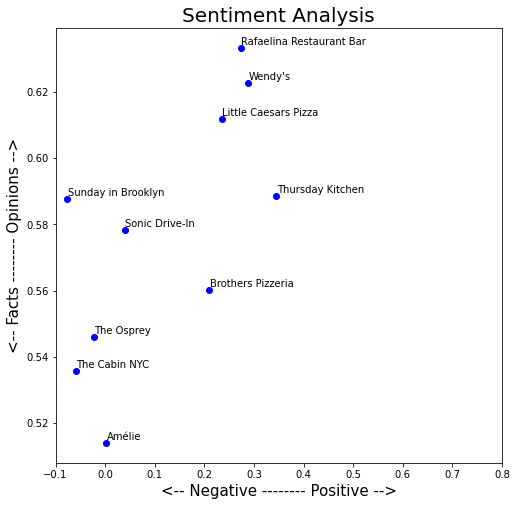

In [80]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]

for index, resturant in enumerate(data_df.index):
    x = data_df.polarity.loc[resturant]
    y = data_df.subjectivity.loc[resturant]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001,resturant_names[index] , fontsize=10)
    plt.xlim(-.1, 0.8) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [65]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [66]:
data_df

,transcript,polarity,subjectivity
Amélie,"22 W 8th St New York, NY 10011 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your rev...",0.345364,0.588605
Brothers Pizzeria,"27 E Kingsbridge Rd Bronx, NY 10468 Yelp users haven’t asked any questions yet about Brothers Pizzeria. Your trust is our top concern, so business...",-0.059299,0.535701
Little Caesars Pizza,"119 W Kingsbridge Rd Bronx, NY 10468 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start yo...",0.001793,0.513999
Rafaelina Restaurant Bar,"2776 Webster Ave Bronx, NY 10458 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r...",-0.023464,0.546055
Sonic Drive-In,"11555 Kaw Dr Bonner Springs, KS 66012 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start y...",-0.076017,0.587605
Sunday in Brooklyn,"348 Wythe Ave Brooklyn, NY 11249 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your r...",0.210248,0.560246
The Cabin NYC,"205 E 4th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re...",0.235032,0.611962
The Osprey,"60 Furman St Brooklyn, NY 11201 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re...",0.273020,0.633371
Thursday Kitchen,"424 E 9th St New York, NY 10009 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your re...",0.287476,0.622560
Wendy's,"2120 N. Woodlawn Wichita, KS 67208 Yelp users haven’t asked any questions yet about Wendy's. Your trust is our top concern, so businesses can't pa...",0.039897,0.578461


In [83]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_df.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["22 W 8th St New York, NY 10011 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more. Start your review of Amélie. COVID dining update -So happy to be able to return to my favorite spot for brunch! Amélie is still as delicious as I remembered.Indoor dining felt quite safe here. They had extremely high partitions between tables that were not spaced 6' apart (but otherwise social distancing was observed). Less than 25% of capacity was used indoors when we dined on Sat during brunch (outdoors was quite bustling).My husband and I shared our favorite menu items, including the chicken liver mousse (which was listed as a separate brunch special item - so don't be disappointed when you don't see it on the regular brunch menu online!), moules frites, and grilled octopus. The first two hadn",
  '\'t changed a bit, but the octopus was updated from a ratatouille base to a tabouleh, which I thought was a nice improvement. Amélie is my go-to for weeke

In [84]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [85]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [86]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.2555984211866565,
  0.15087719298245614,
  0.5042222222222222,
  0.27176470588235296,
  0.28711375175070025,
  0.278015873015873,
  0.321077694235589,
  0.5554166666666667,
  0.48287878787878785,
  0.3540823412698413],
 [0.43714285714285717,
  -0.19999999999999998,
  -0.015476190476190492,
  -0.2222222222222222,
  0.07321428571428572,
  -0.13333333333333333,
  -0.4047619047619048,
  -0.3886863425925926,
  -0.2,
  0.2767857142857143],
 [0.1375,
  -0.19393939393939394,
  0.12499999999999999,
  0.021833333333333326,
  0.0325284090909091,
  -0.05694444444444445,
  -0.09376736111111113,
  0.016997354497354497,
  0.1372767857142857,
  0.03182870370370369],
 [0.09166666666666667,
  -0.125,
  -0.12380952380952381,
  -0.5,
  -0.01875,
  -0.016414141414141412,
  0.07813446969696969,
  -0.016666666666666663,
  0.1775,
  -0.0042699724517906565],
 [0.22083333333333335,
  -0.1722222222222222,
  -0.40714285714285714,
  -0.016666666666666663,
  -0.26484374999999993,
  0.18714285714285714,
  -0.244

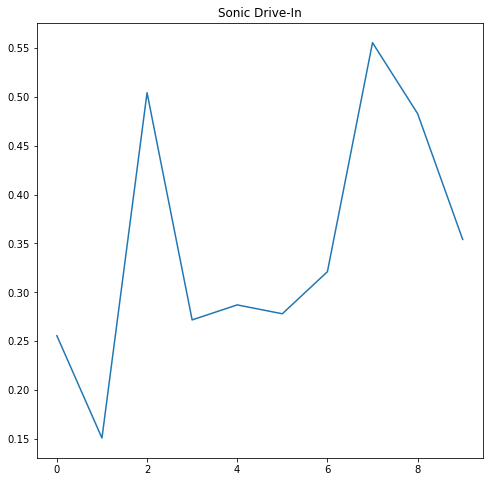

In [87]:
# Show the plot for one resturant
plt.plot(polarity_transcript[0])
plt.title(resturant_names[index])
plt.show()

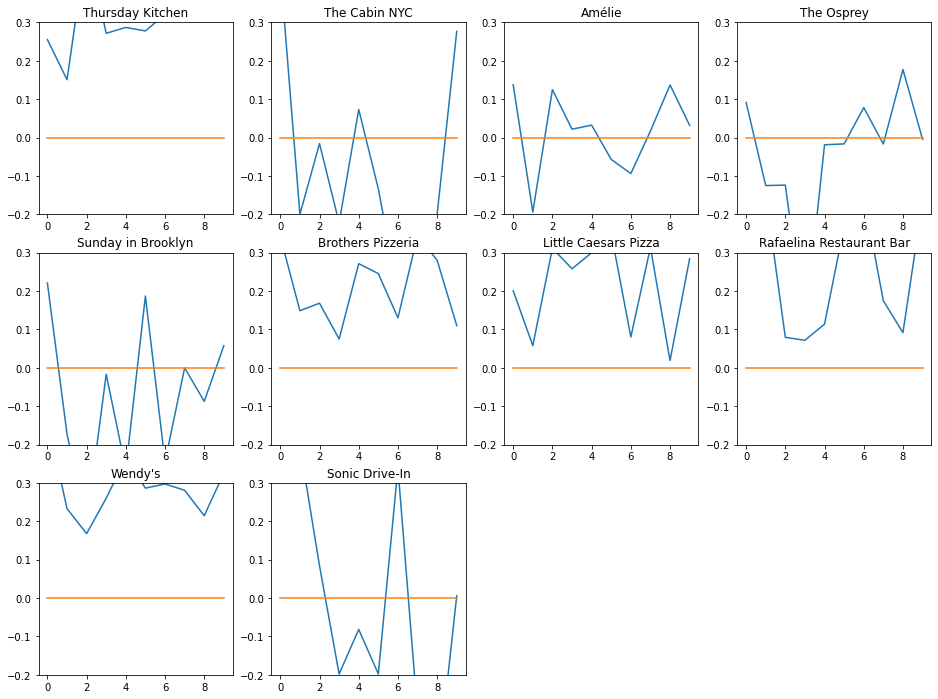

In [88]:
# Show the plot for all resturant
plt.rcParams['figure.figsize'] = [16, 12]

for index, resturant in enumerate(data_df.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(resturant_names[index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [89]:
#Topic Modeling 

In [90]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [91]:
# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,Amélie,Brothers Pizzeria,Little Caesars Pizza,Rafaelina Restaurant Bar,Sonic Drive-In,Sunday in Brooklyn,The Cabin NYC,The Osprey,Thursday Kitchen,Wendy's
aa,0,0,1,0,0,0,0,0,0,0
abandon,0,1,0,0,0,0,0,0,0,0
able,1,0,1,0,0,3,0,0,3,0
absolute,0,0,0,0,0,0,0,1,0,0
absolutely,1,0,0,0,0,1,0,0,3,2


In [92]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [93]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix

id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [94]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

2021-05-09 20:26:08,415 : INFO : using symmetric alpha at 0.5
2021-05-09 20:26:08,416 : INFO : using symmetric eta at 0.5
2021-05-09 20:26:08,417 : INFO : using serial LDA version on this node
2021-05-09 20:26:08,447 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:08,612 : INFO : -8.228 per-word bound, 299.8 perplexity estimate based on a held-out corpus of 10 documents with 5897 words
2021-05-09 20:26:08,612 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:08,657 : INFO : topic #0 (0.500): 0.011*"food" + 0.009*"place" + 0.007*"good" + 0.007*"time" + 0.006*"order" + 0.005*"service" + 0.005*"ordered" + 0.005*"great" + 0.005*"like" + 0.005*"restaurant"
2021-05-09 20:26:08,659 : INFO : topic #1 (0.500): 0.008*"food" + 0.006*"just" + 0.006*"place" + 0.005*"grea

[(0,
  '0.012*"food" + 0.008*"place" + 0.008*"order" + 0.007*"time" + 0.006*"good" + 0.006*"service" + 0.006*"just" + 0.006*"restaurant" + 0.006*"like" + 0.005*"great"'),
 (1,
  '0.007*"food" + 0.006*"brunch" + 0.006*"place" + 0.006*"came" + 0.006*"good" + 0.005*"great" + 0.005*"chicken" + 0.005*"drinks" + 0.005*"really" + 0.005*"time"')]

In [95]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

2021-05-09 20:26:09,270 : INFO : using symmetric alpha at 0.3333333333333333
2021-05-09 20:26:09,271 : INFO : using symmetric eta at 0.3333333333333333
2021-05-09 20:26:09,272 : INFO : using serial LDA version on this node
2021-05-09 20:26:09,274 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:09,329 : INFO : -8.552 per-word bound, 375.4 perplexity estimate based on a held-out corpus of 10 documents with 5897 words
2021-05-09 20:26:09,330 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:09,352 : INFO : topic #0 (0.333): 0.010*"food" + 0.008*"place" + 0.007*"time" + 0.006*"just" + 0.005*"great" + 0.005*"order" + 0.005*"like" + 0.005*"service" + 0.005*"ordered" + 0.004*"chicken"
2021-05-09 20:26:09,354 : INFO : topic #1 (0.333): 0.008*"food" + 0.006*"place" +

[(0,
  '0.016*"food" + 0.009*"called" + 0.009*"delivery" + 0.008*"order" + 0.007*"place" + 0.007*"time" + 0.006*"restaurant" + 0.005*"ordered" + 0.005*"didnt" + 0.005*"hours"'),
 (1,
  '0.009*"food" + 0.008*"good" + 0.007*"drinks" + 0.007*"place" + 0.007*"cheese" + 0.007*"time" + 0.007*"truffle" + 0.006*"great" + 0.005*"came" + 0.005*"mac"'),
 (2,
  '0.008*"food" + 0.007*"place" + 0.006*"just" + 0.006*"good" + 0.006*"like" + 0.006*"time" + 0.006*"order" + 0.005*"great" + 0.005*"brunch" + 0.005*"service"')]

In [96]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

2021-05-09 20:26:10,016 : INFO : using symmetric alpha at 0.25
2021-05-09 20:26:10,017 : INFO : using symmetric eta at 0.25
2021-05-09 20:26:10,018 : INFO : using serial LDA version on this node
2021-05-09 20:26:10,021 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:10,066 : INFO : -8.926 per-word bound, 486.5 perplexity estimate based on a held-out corpus of 10 documents with 5897 words
2021-05-09 20:26:10,067 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:10,086 : INFO : topic #0 (0.250): 0.012*"food" + 0.010*"place" + 0.009*"good" + 0.006*"time" + 0.006*"service" + 0.006*"just" + 0.006*"great" + 0.005*"order" + 0.005*"chicken" + 0.005*"like"
2021-05-09 20:26:10,088 : INFO : topic #1 (0.250): 0.010*"food" + 0.008*"time" + 0.006*"like" + 0.005*"place" + 

[(0,
  '0.013*"food" + 0.008*"place" + 0.007*"good" + 0.007*"time" + 0.007*"great" + 0.006*"just" + 0.006*"chicken" + 0.006*"like" + 0.006*"came" + 0.005*"ordered"'),
 (1,
  '0.009*"wine" + 0.008*"place" + 0.007*"pizza" + 0.007*"restaurant" + 0.006*"time" + 0.006*"good" + 0.006*"dont" + 0.006*"order" + 0.005*"food" + 0.005*"great"'),
 (2,
  '0.009*"order" + 0.008*"sonic" + 0.007*"service" + 0.006*"cold" + 0.005*"food" + 0.005*"tell" + 0.005*"lemonade" + 0.004*"rude" + 0.004*"place" + 0.004*"ordered"'),
 (3,
  '0.011*"wendys" + 0.007*"service" + 0.006*"just" + 0.006*"good" + 0.006*"really" + 0.006*"fries" + 0.005*"place" + 0.005*"order" + 0.005*"usually" + 0.005*"pecans"')]

In [97]:
## Topic Modeling - Attempt #2 (Nouns Only)

In [98]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [99]:
# Read in the cleaned data, before the CountVectorizer step

data_clean

,transcript
Amélie,w st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of amélie c...
Brothers Pizzeria,e kingsbridge rd bronx ny yelp users havent asked any questions yet about brothers pizzeria your trust is our top concern so businesses cant pay...
Little Caesars Pizza,w kingsbridge rd bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of ...
Rafaelina Restaurant Bar,webster ave bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of rafae...
Sonic Drive-In,kaw dr bonner springs ks your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of s...
Sunday in Brooklyn,wythe ave brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of sund...
The Cabin NYC,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the cabi...
The Osprey,furman st brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the ...
Thursday Kitchen,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of thursday...
Wendy's,n woodlawn wichita ks yelp users havent asked any questions yet about wendys your trust is our top concern so businesses cant pay to alter or re...


In [100]:
# Apply the nouns function to the transcripts to filter only on nouns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pragati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pragati\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,transcript
Amélie,w york trust concern businesses pay reviews review amélie covid spot brunch amélie partitions tables distancing capacity indoors sat outdoors husb...
Brothers Pizzeria,e kingsbridge rd bronx ny yelp users questions brothers trust concern businesses pay reviews review brothers delivery timepizza food n point every...
Little Caesars Pizza,w kingsbridge rd bronx trust concern businesses pay reviews review caesars pizza order caesars dish cheese word advice home oven pizza review cust...
Rafaelina Restaurant Bar,webster trust concern businesses pay reviews review rafaelina restaurant bar i delivery night service food wasnt i order i didnt option i service ...
Sonic Drive-In,kaw dr bonner springs trust concern businesses pay reviews review drivein intersection area lot choices i need something wet hike slush time food ...
Sunday in Brooklyn,wythe trust concern businesses pay reviews review sunday brooklyn sunday brooklyn brunch spot matter monday tuesday day week sure food cause mile ...
The Cabin NYC,york trust concern businesses pay reviews review cabin nyc establishment stars i music food owner everyone measures favor cabin restaurant experie...
The Osprey,st brooklyn trust concern businesses pay reviews review osprey restaurant seating time friend afternoon drink conversation music isnt time ambienc...
Thursday Kitchen,york trust concern businesses pay reviews review kitchen i spot fusion tapas edamame truffle mac chicken cauliflower order favorites dumplings sho...
Wendy's,woodlawn wichita ks yelp users questions wendys trust concern businesses pay reviews review yesterday breakfast time bacon egg biscuit wendys baco...


In [101]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','just','cecconis','restaurant','wendys','sunday' ]
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,accents,accomplishment,accounts,ad,addon,adorableyou,advance,advice,advise,afternoon,...,ye,year,years,yelp,yesterday,york,youll,youve,yuzu,zaatar
Amélie,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
Brothers Pizzeria,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
Little Caesars Pizza,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Rafaelina Restaurant Bar,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Sonic Drive-In,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Sunday in Brooklyn,0,0,1,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
The Cabin NYC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
The Osprey,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
Thursday Kitchen,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,0,1,0
Wendy's,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [102]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [103]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

2021-05-09 20:26:14,681 : INFO : using symmetric alpha at 0.5
2021-05-09 20:26:14,682 : INFO : using symmetric eta at 0.5
2021-05-09 20:26:14,682 : INFO : using serial LDA version on this node
2021-05-09 20:26:14,683 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:14,706 : INFO : -7.644 per-word bound, 200.1 perplexity estimate based on a held-out corpus of 10 documents with 2753 words
2021-05-09 20:26:14,707 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:14,719 : INFO : topic #0 (0.500): 0.025*"food" + 0.016*"place" + 0.013*"service" + 0.013*"order" + 0.006*"drinks" + 0.006*"chicken" + 0.005*"pizza" + 0.005*"fries" + 0.005*"brunch" + 0.005*"staff"
2021-05-09 20:26:14,720 : INFO : topic #1 (0.500): 0.015*"food" + 0.014*"place" + 0.009*"chicken" + 0.009*"b

[(0,
  '0.025*"food" + 0.020*"place" + 0.016*"order" + 0.014*"service" + 0.007*"delivery" + 0.006*"drinks" + 0.006*"fries" + 0.006*"chicken" + 0.006*"brunch" + 0.006*"pizza"'),
 (1,
  '0.013*"food" + 0.009*"place" + 0.009*"chicken" + 0.007*"brunch" + 0.007*"wait" + 0.006*"drinks" + 0.006*"spot" + 0.006*"reservation" + 0.006*"dinner" + 0.006*"pancakes"')]

In [104]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

2021-05-09 20:26:15,011 : INFO : using symmetric alpha at 0.3333333333333333
2021-05-09 20:26:15,013 : INFO : using symmetric eta at 0.3333333333333333
2021-05-09 20:26:15,014 : INFO : using serial LDA version on this node
2021-05-09 20:26:15,016 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:15,041 : INFO : -8.002 per-word bound, 256.3 perplexity estimate based on a held-out corpus of 10 documents with 2753 words
2021-05-09 20:26:15,042 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:15,054 : INFO : topic #0 (0.333): 0.026*"food" + 0.014*"place" + 0.011*"service" + 0.010*"order" + 0.008*"chicken" + 0.008*"drinks" + 0.007*"delivery" + 0.006*"brunch" + 0.005*"spot" + 0.005*"menu"
2021-05-09 20:26:15,056 : INFO : topic #1 (0.333): 0.019*"food" + 0.018*"plac

[(0,
  '0.031*"food" + 0.017*"place" + 0.009*"service" + 0.009*"order" + 0.008*"chicken" + 0.008*"drinks" + 0.008*"brunch" + 0.007*"wine" + 0.006*"delivery" + 0.006*"spot"'),
 (1,
  '0.016*"service" + 0.015*"food" + 0.015*"order" + 0.014*"place" + 0.009*"mac" + 0.008*"truffle" + 0.007*"chicken" + 0.007*"dishes" + 0.007*"paella" + 0.006*"customer"'),
 (2,
  '0.012*"place" + 0.012*"brunch" + 0.009*"pizza" + 0.009*"pancakes" + 0.008*"food" + 0.007*"order" + 0.007*"chicken" + 0.007*"reservation" + 0.007*"avocado" + 0.007*"employee"')]

In [105]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

2021-05-09 20:26:15,355 : INFO : using symmetric alpha at 0.25
2021-05-09 20:26:15,356 : INFO : using symmetric eta at 0.25
2021-05-09 20:26:15,357 : INFO : using serial LDA version on this node
2021-05-09 20:26:15,358 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:15,385 : INFO : -8.435 per-word bound, 346.1 perplexity estimate based on a held-out corpus of 10 documents with 2753 words
2021-05-09 20:26:15,386 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:15,396 : INFO : topic #0 (0.250): 0.014*"food" + 0.010*"place" + 0.008*"drinks" + 0.008*"order" + 0.007*"brunch" + 0.007*"service" + 0.006*"chicken" + 0.006*"wait" + 0.006*"mac" + 0.006*"spot"
2021-05-09 20:26:15,398 : INFO : topic #1 (0.250): 0.028*"food" + 0.018*"place" + 0.016*"order" + 0.010*"servi

[(0,
  '0.016*"mac" + 0.015*"truffle" + 0.013*"paella" + 0.011*"dishes" + 0.010*"chicken" + 0.010*"wait" + 0.010*"dumplings" + 0.008*"food" + 0.008*"drinks" + 0.007*"place"'),
 (1,
  '0.031*"food" + 0.022*"order" + 0.020*"place" + 0.017*"delivery" + 0.015*"pizza" + 0.010*"service" + 0.009*"employee" + 0.009*"hours" + 0.008*"location" + 0.008*"douche"'),
 (2,
  '0.021*"food" + 0.018*"place" + 0.012*"brunch" + 0.010*"drinks" + 0.009*"service" + 0.009*"wine" + 0.008*"chicken" + 0.008*"spot" + 0.008*"menu" + 0.007*"fries"'),
 (3,
  '0.018*"food" + 0.013*"place" + 0.011*"service" + 0.010*"order" + 0.009*"brunch" + 0.008*"fries" + 0.007*"chicken" + 0.007*"pancakes" + 0.006*"dinner" + 0.006*"reservation"')]

In [106]:
## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [107]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [108]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
Amélie,w new york trust top concern businesses cant pay reviews more start review amélie covid update happy able favorite spot brunch amélie delicious i ...
Brothers Pizzeria,e kingsbridge rd bronx ny yelp users questions brothers trust top concern businesses cant pay reviews more start review brothers delivery timepizz...
Little Caesars Pizza,w kingsbridge rd bronx trust top concern businesses cant pay reviews more start review little caesars only pizza i order little caesars deep deep ...
Rafaelina Restaurant Bar,webster trust top concern businesses cant pay reviews more start review rafaelina restaurant bar i delivery wednesday night i horrible service gre...
Sonic Drive-In,kaw dr bonner springs trust top concern businesses cant pay reviews more start review sonic drivein intersection area lot other choices i busy i n...
Sunday in Brooklyn,wythe trust top concern businesses cant pay reviews more start review sunday brooklyn sunday brooklyn brunch spot matter monday tuesday other day ...
The Cabin NYC,st new york trust top concern businesses cant pay reviews more start review cabin nyc establishment give stars i atmosphere music food owner frien...
The Osprey,furman st brooklyn trust top concern businesses cant pay reviews more start review osprey restaurant incredible outdoor seating first time friend ...
Thursday Kitchen,st new york trust top concern businesses cant pay reviews more start review thursday kitchen i spot best korean fusion tapas ive edamame steak tru...
Wendy's,n woodlawn wichita ks yelp users questions wendys trust top concern businesses cant pay reviews more start review wendys yesterday breakfast first...


In [109]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aa,able,absolute,accents,accommodate,accomplishment,accounts,accurate,actual,ad,...,years,yelp,yesterday,york,youll,yous,youve,yummy,yuzu,zaatar
Amélie,0,1,0,0,0,0,0,0,0,0,...,2,0,0,1,0,1,0,0,0,0
Brothers Pizzeria,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Little Caesars Pizza,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Rafaelina Restaurant Bar,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Sonic Drive-In,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Sunday in Brooklyn,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
The Cabin NYC,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
The Osprey,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
Thursday Kitchen,0,3,0,0,0,1,0,0,1,0,...,1,0,0,3,0,0,0,0,1,0
Wendy's,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [110]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [111]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

2021-05-09 20:26:17,338 : INFO : using symmetric alpha at 0.5
2021-05-09 20:26:17,340 : INFO : using symmetric eta at 0.5
2021-05-09 20:26:17,341 : INFO : using serial LDA version on this node
2021-05-09 20:26:17,342 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:17,373 : INFO : -7.928 per-word bound, 243.5 perplexity estimate based on a held-out corpus of 10 documents with 3487 words
2021-05-09 20:26:17,374 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:17,387 : INFO : topic #0 (0.500): 0.006*"chicken" + 0.006*"brunch" + 0.006*"cheese" + 0.005*"nice" + 0.005*"little" + 0.005*"drinks" + 0.004*"ive" + 0.004*"wait" + 0.004*"fries" + 0.004*"delicious"
2021-05-09 20:26:17,388 : INFO : topic #1 (0.500): 0.006*"brunch" + 0.006*"chicken" + 0.006*"cheese" + 0.00

[(0,
  '0.010*"brunch" + 0.006*"wine" + 0.006*"little" + 0.005*"cheese" + 0.005*"chicken" + 0.005*"ive" + 0.005*"delicious" + 0.005*"pizza" + 0.005*"hour" + 0.005*"avocado"'),
 (1,
  '0.007*"drinks" + 0.007*"chicken" + 0.007*"cheese" + 0.005*"nice" + 0.005*"delivery" + 0.005*"truffle" + 0.004*"spot" + 0.004*"delicious" + 0.004*"wait" + 0.004*"mac"')]

In [112]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

2021-05-09 20:26:17,833 : INFO : using symmetric alpha at 0.3333333333333333
2021-05-09 20:26:17,834 : INFO : using symmetric eta at 0.3333333333333333
2021-05-09 20:26:17,835 : INFO : using serial LDA version on this node
2021-05-09 20:26:17,837 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:17,874 : INFO : -8.301 per-word bound, 315.5 perplexity estimate based on a held-out corpus of 10 documents with 3487 words
2021-05-09 20:26:17,875 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:17,890 : INFO : topic #0 (0.333): 0.007*"chicken" + 0.006*"drinks" + 0.006*"brunch" + 0.005*"delivery" + 0.005*"nice" + 0.005*"ive" + 0.005*"cheese" + 0.004*"menu" + 0.004*"staff" + 0.004*"delicious"
2021-05-09 20:26:17,891 : INFO : topic #1 (0.333): 0.007*"cheese" + 0.007*"

[(0,
  '0.009*"brunch" + 0.008*"delivery" + 0.007*"chicken" + 0.007*"ive" + 0.006*"hours" + 0.006*"hour" + 0.006*"avocado" + 0.006*"pancakes" + 0.004*"spot" + 0.004*"reservation"'),
 (1,
  '0.012*"cheese" + 0.007*"wine" + 0.006*"little" + 0.006*"truffle" + 0.006*"pizza" + 0.006*"nice" + 0.006*"delicious" + 0.006*"menu" + 0.006*"mac" + 0.005*"fries"'),
 (2,
  '0.009*"drinks" + 0.006*"chicken" + 0.006*"brunch" + 0.006*"spot" + 0.006*"nice" + 0.006*"portion" + 0.004*"reservation" + 0.004*"table" + 0.004*"dinner" + 0.004*"friend"')]

In [113]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

2021-05-09 20:26:18,268 : INFO : using symmetric alpha at 0.25
2021-05-09 20:26:18,269 : INFO : using symmetric eta at 0.25
2021-05-09 20:26:18,270 : INFO : using serial LDA version on this node
2021-05-09 20:26:18,272 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:18,307 : INFO : -8.752 per-word bound, 431.0 perplexity estimate based on a held-out corpus of 10 documents with 3487 words
2021-05-09 20:26:18,307 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:18,322 : INFO : topic #0 (0.250): 0.007*"brunch" + 0.007*"chicken" + 0.005*"cheese" + 0.005*"drinks" + 0.005*"nice" + 0.005*"delicious" + 0.004*"dinner" + 0.004*"ive" + 0.004*"little" + 0.004*"spot"
2021-05-09 20:26:18,323 : INFO : topic #1 (0.250): 0.007*"cheese" + 0.007*"chicken" + 0.007*"brunch" + 0

[(0,
  '0.001*"brunch" + 0.001*"chicken" + 0.001*"cheese" + 0.001*"delicious" + 0.001*"nice" + 0.001*"drinks" + 0.001*"dinner" + 0.001*"wine" + 0.001*"ive" + 0.001*"spot"'),
 (1,
  '0.009*"chicken" + 0.009*"drinks" + 0.009*"cheese" + 0.007*"delivery" + 0.007*"truffle" + 0.006*"spot" + 0.006*"mac" + 0.005*"nice" + 0.005*"wait" + 0.005*"new"'),
 (2,
  '0.009*"brunch" + 0.006*"avocado" + 0.006*"chicken" + 0.006*"little" + 0.006*"nice" + 0.006*"pizza" + 0.006*"brooklyn" + 0.006*"pancakes" + 0.005*"reservation" + 0.005*"delicious"'),
 (3,
  '0.013*"wine" + 0.008*"french" + 0.007*"cheese" + 0.006*"brunch" + 0.006*"happy" + 0.006*"flights" + 0.006*"sauce" + 0.005*"menu" + 0.005*"sonic" + 0.005*"medium"')]

In [114]:
## Identify Topics in Each Document

In [115]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

2021-05-09 20:26:18,714 : INFO : using symmetric alpha at 0.25
2021-05-09 20:26:18,715 : INFO : using symmetric eta at 0.25
2021-05-09 20:26:18,716 : INFO : using serial LDA version on this node
2021-05-09 20:26:18,717 : INFO : running online (multi-pass) LDA training, 4 topics, 80 passes over the supplied corpus of 10 documents, updating model once every 10 documents, evaluating perplexity every 10 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-09 20:26:18,749 : INFO : -8.750 per-word bound, 430.5 perplexity estimate based on a held-out corpus of 10 documents with 3487 words
2021-05-09 20:26:18,750 : INFO : PROGRESS: pass 0, at document #10/10
2021-05-09 20:26:18,762 : INFO : topic #0 (0.250): 0.007*"brunch" + 0.007*"cheese" + 0.006*"chicken" + 0.006*"nice" + 0.005*"delicious" + 0.005*"little" + 0.005*"wine" + 0.005*"ive" + 0.004*"steak" + 0.004*"wait"
2021-05-09 20:26:18,764 : INFO : topic #1 (0.250): 0.006*"cheese" + 0.006*"brunch" + 0.006*"chicken" + 0.00

[(0,
  '0.010*"brunch" + 0.007*"wine" + 0.006*"nice" + 0.006*"delicious" + 0.006*"little" + 0.006*"chicken" + 0.005*"dinner" + 0.005*"avocado" + 0.005*"cheese" + 0.005*"staff"'),
 (1,
  '0.018*"delivery" + 0.010*"hours" + 0.007*"hour" + 0.007*"man" + 0.006*"didnt" + 0.006*"woman" + 0.006*"pork" + 0.006*"chicken" + 0.004*"customer" + 0.004*"spanish"'),
 (2,
  '0.010*"drinks" + 0.010*"cheese" + 0.008*"chicken" + 0.008*"truffle" + 0.007*"mac" + 0.006*"spot" + 0.006*"small" + 0.006*"new" + 0.005*"ive" + 0.005*"menu"'),
 (3,
  '0.001*"worst" + 0.001*"horrible" + 0.001*"rude" + 0.001*"customer" + 0.001*"older" + 0.001*"mins" + 0.001*"health" + 0.001*"department" + 0.001*"fresh" + 0.001*"soda"')]

In [116]:
#These four topics look pretty decent. Let's settle on these for now.
#Topic 0: snacks
# Topic 1: interior
#Topic 2: food
# Topic 3: branch

In [69]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'Amélie'),
 (3, 'Brothers Pizzeria'),
 (3, 'Little Caesars Pizza'),
 (3, 'Rafaelina Restaurant Bar'),
 (0, 'Sonic Drive-In'),
 (0, 'Sunday in Brooklyn'),
 (0, 'The Cabin NYC'),
 (2, 'The Osprey'),
 (1, 'Thursday Kitchen'),
 (1, "Wendy's")]

In [70]:
#These four topics look pretty decent. Let's settle on these for now.
#Topic 0: snacks [1803,Amélie ]
# Topic 1: interior [Cecconi's Dumbo,The Osprey]
#Topic 2: food[Benemon,Thursday Kitchen]
# Topic 3: branch[Sunday in Brooklyn',While We Were Young,The Cabin NYC]

In [71]:
# Text Generation

In [72]:
data_clean

,transcript
Amélie,w st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of amélie c...
Brothers Pizzeria,e kingsbridge rd bronx ny yelp users havent asked any questions yet about brothers pizzeria your trust is our top concern so businesses cant pay...
Little Caesars Pizza,w kingsbridge rd bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of ...
Rafaelina Restaurant Bar,webster ave bronx ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of rafae...
Sonic Drive-In,kaw dr bonner springs ks your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of s...
Sunday in Brooklyn,wythe ave brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of sund...
The Cabin NYC,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the cabi...
The Osprey,furman st brooklyn ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of the ...
Thursday Kitchen,e st new york ny your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of thursday...
Wendy's,n woodlawn wichita ks yelp users havent asked any questions yet about wendys your trust is our top concern so businesses cant pay to alter or re...


In [73]:
# Extract only Thrusday Kitchen text
tk_text = data_clean.transcript.loc['Thursday Kitchen']
tk_text[:200]

' e  st new york ny  your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of thursday kitchen i loved this spot and would argue its one of '

In [74]:
## Build a Markov Chain Function


In [75]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [76]:
# Create the dictionary for thrusday Kitchen routine, take a look at it
tk_dict = markov_chain(tk_text)
tk_dict

{'': ['e',
  'st',
  'your',
  'cheese',
  'steak',
  'edamame',
  'creamy',
  'parmesan',
  'and',
  'each',
  'truffle',
  'cheese',
  'i',
  'pretty',
  'spiced',
  'cheese',
  'and',
  'we',
  'team',
  '',
  '',
  'years',
  'overall',
  'steak',
  'must',
  'everything',
  'must',
  'amazing',
  '',
  'gnocchi',
  'pm',
  'items',
  'people',
  'stars',
  'on',
  'hours',
  'people',
  'on'],
 'e': [''],
 'st': ['new'],
 'new': ['york', '\xa0favoriteps', 'york', 'york'],
 'york': ['ny', 'new', 'i'],
 'ny': [''],
 'your': ['trust', 'review', 'table', 'choices', 'interest', 'pill'],
 'trust': ['is'],
 'is': ['our',
  'i',
  'a',
  'definitely',
  'now',
  'what',
  'an',
  'my',
  'because',
  'amazing',
  'understandable',
  'i',
  'quite',
  'wonderful'],
 'our': ['top',
  'drink',
  'table',
  'dinnerserver',
  'favorite',
  'list',
  'friends',
  'waitress',
  'dining'],
 'top': ['concern', 'of', 'of'],
 'concern': ['so'],
 'so': ['businesses', 'unique', 'grateful', 'many', 'we

In [77]:
## Create a Text Generator

In [78]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [186]:
generate_sentence(tk_dict)

'Rich and had more filling since this was spicy korean fusion tapas ive had anything.'

In [187]:
# Extract only Little Caesars Pizza  text
lP_text = data_clean.transcript.loc['Little Caesars Pizza']
lP_text[:200]

' w kingsbridge rd bronx ny  your trust is our top concern so businesses cant pay to alter or remove their reviews learn more start your review of little caesars pizza tbh the only pizza i order from l'

In [188]:
# Create the dictionary for Little Caesars Pizza , take a look at it
lp_dict = markov_chain(lP_text)
lp_dict

{'': ['w',
  'your',
  'others',
  'times',
  'star',
  'employee',
  'but',
  'for',
  'each',
  'or',
  'people',
  'fee',
  'min',
  'mins'],
 'w': ['kingsbridge', 'dark'],
 'kingsbridge': ['rd'],
 'rd': ['bronx'],
 'bronx': ['ny', 'for'],
 'ny': [''],
 'your': ['trust', 'review', 'order', 'order'],
 'trust': ['is'],
 'is': ['our',
  'the',
  'review',
  'solely',
  'while',
  'robbing',
  'very',
  'nasty',
  'a',
  'run',
  'about',
  'franchise',
  'very',
  'pretty'],
 'our': ['top'],
 'top': ['concern'],
 'concern': ['so'],
 'so': ['businesses', 'she', 'if'],
 'businesses': ['cant'],
 'cant': ['pay'],
 'pay': ['to', 'attention'],
 'to': ['alter',
  'pizza',
  'make',
  'get',
  'order',
  'the',
  'customers',
  'mistake',
  '',
  'be',
  'someone',
  'give',
  'keep',
  'loud',
  'the',
  'begin',
  'details',
  'sell',
  'local',
  'pry',
  'go',
  'make',
  'be'],
 'alter': ['or'],
 'or': ['remove', 'you', 'you', 'be', 'handles', 'carbon', 'juice', ''],
 'remove': ['their'],

In [189]:
generate_sentence(lp_dict)

'African american are african american are raising there own prices store is run by an.'